In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_excel("Tools.xlsx")

In [50]:
data.isnull().sum()

Record ID               0
Requested By            0
Requested On            0
Description             0
Location                0
Category                0
Sub Category            0
Type                    0
Priority                0
Severity                0
Cost Code               8
Status                  0
Approval Details     1631
Approved On             6
Resolved By           186
Response Due            7
Actual Response        47
Completion Due        111
Actual Completion     194
SLA Status             85
Response Status        85
Completion Status      85
Resolution             48
Resolved By.1         186
Rating                245
Rating Remarks       1598
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 26 columns):
Record ID            1654 non-null int64
Requested By         1654 non-null object
Requested On         1654 non-null object
Description          1654 non-null object
Location             1654 non-null object
Category             1654 non-null object
Sub Category         1654 non-null object
Type                 1654 non-null object
Priority             1654 non-null object
Severity             1654 non-null object
Cost Code            1646 non-null object
Status               1654 non-null object
Approval Details     23 non-null object
Approved On          1648 non-null object
Resolved By          1468 non-null object
Response Due         1647 non-null object
Actual Response      1607 non-null object
Completion Due       1543 non-null object
Actual Completion    1460 non-null object
SLA Status           1569 non-null object
Response Status      1569 non-null object
Completion Sta

# creating emp id

In [52]:
docs = data['Requested By'].str.lower()
docs = docs.str.replace('[^0-9 ]', '')
docs.head()

0       2301
1       2704
2       2269
3       2937
4       2632
Name: Requested By, dtype: object

In [53]:
data["Emp id"] =  docs

In [54]:
data.head(2).T

,0,1
Record ID,53461,53425
Requested By,Rakesh Sekar2301,Deepika R2704
Requested On,2019-04-30 18:16:33,2019-04-30 16:41:46
Description,Im not able to enter time sheet entry in one p...,Timesheet report needs to send to management
Location,Bengaluru - IT,OMR-IT
Category,Oneprodapt,Oneprodapt
Sub Category,Qmine,DMT
Type,Service Request,Service Request
Priority,Medium,Medium
Severity,Sev 1,Sev 1


In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(data)

Number of variables,27
Number of observations,1654
Total Missing (%),10.1%
Total size in memory,349.0 KiB
Average record size in memory,216.0 B
Numeric,1
Categorical,26
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [55]:
data.columns

Index(['Record ID', 'Requested By', 'Requested On', 'Description', 'Location',
       'Category', 'Sub Category', 'Type', 'Priority', 'Severity', 'Cost Code',
       'Status', 'Approval Details', 'Approved On', 'Resolved By',
       'Response Due', 'Actual Response', 'Completion Due',
       'Actual Completion', 'SLA Status', 'Response Status',
       'Completion Status', 'Resolution', 'Resolved By.1', 'Rating',
       'Rating Remarks', 'Emp id'],
      dtype='object')

# NLP


In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunsingh.s\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [77]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arunsingh.s\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = ['will', 'please', 'change', 'team', 'request', 'thanks', 'kindly', 'hi']
stopwords.extend(custom_stop_words)

def clean_sentence(text):
    words = text.split(' ')
    clean_words = [word for word in words if word not in stopwords]
    return ' '.join(clean_words)


docs = data['Description'].str.lower()
docs = docs.str.replace('[^a-z ]', '')
docs_clean = docs.apply(clean_sentence)
docs_clean.shape

(1654,)

In [74]:


stopwords = nltk.corpus.stopwords.words('english')
#custom_stopwords = []
custom_stop_words = ['will', 'please', 'change', 'team', 'request', 'thanks', 'kindly', 'hi']
stopwords.extend(custom_stop_words)
stemmer = nltk.stem.PorterStemmer()

docs_clean = []
for doc in docs:
    words = nltk.word_tokenize(doc)
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    docs_clean.append(words_clean)
    
docs = data['Description'].str.lower()
docs = docs.str.replace('[^a-z ]', '')
docs_clean = docs.apply(clean_sentence)
docs_clean.shape

(1606,)

In [78]:
#dictionary = gensim.corpora.Dictionary(docs_clean)

In [76]:
docs_clean

0       im able enter time sheet entry one prodapt aud...
1                  timesheet report needs send management
2       meena make liberty globalrim account inactive ...
3            office  got mail ats saying absent day check
4       timesheet oneprodapt greyed able accept entrie...
5         provide access erp active employee details file
6       give tamizhventhankr  access mis reporterp emp...
7       deepika send ats first swipe date mentioned do...
8       share lg travel plan details fpm projections n...
9       unable extend members end date  program end da...
10      part enhancing skills database would add domai...
11      teami owner risk cannot find action close view...
12      got mail though office reason entered late com...
13      driven auto populated creating fpm plan progra...
14      deepikakindly update ticket id  resolved state...
15      hii unable raise risk risk portal dont access ...
16      providing delivery manager access sathya raman...
17      add ti

In [79]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [85]:
doc_sample = data[data['Description']]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

KeyError: 'None of [Index([\'Im not able to enter time sheet entry in one prodapt for Audit Process . Please find the attachment for your reference . Thanks\',\n       \'Timesheet report needs to send to management\',\n       \'There is a request from Meena to make the Liberty Global-RIM account inactive. Attached the mail for reference.\',\n       \'i was in Office on 23/4/2019 but i got mail from ATS saying i was absent on that day.. Please check this\',\n       \'Timesheet in One-Prodapt is greyed out and not able to accept entries for me.\\nPlease help with this issue.\',\n       \'Please provide access to ERP Active employee details file\',\n       \'Please give me and Tamizhventhan.kr , access to below MIS report\\n\\n"ERP All Employee Details with Programs"\',\n       \'Hi Deepika, please send ATS first swipe in date after the mentioned DOJ. refer email which is sent today.\',\n       \'Please share LG Travel Plan details from FPM Projections. We need to know the travel plan – Number of trips & days planned per costcode in LG for our internal analysis. UI data provides only Travel cost and not travel plan details. Kindly share the same from back end and I will raise ticket for this request on monthly basis.\',\n       \'Unable to extend team members end date from 3/31 to 12/31.\\n\\nProgram end date 12/2020\\nResource end date in RMG  is 12/31/19\',\n       ...\n       \'When we try to access the Helpdesk portal shows error as "403 access denied" for the user Yuvaraj K (B1917). please do the needful ASAP.\\n-----------------------\\nAny update on this issue? still we are facing the same. kindly do the needful.\',\n       \'Using Entities to create this CR as there is nothing specific to RMG.\\n\\nCR Details: Mail on new resource allocation to go to DM. Remove Abinaya From more details and add DL-RMG.\',\n       \'Please provide access to all support team members from the level "Executive" & Above "Access - to create purchase help desk ticket"\',\n       \'Please close the TA ticket as it not valid any longer due to change in delivery timelines & the audit team to be associated.\\nNo delete button as yet to perform it from my end.\\nReference - Qmine - New Project Technical Audit (ID:2869)\',\n       \'ATS pendings are not syncing with MIS dashboard report. Please fix this issue on urgent basis.\',\n       \'Kindly request you to change the LOP Reason for 22-03-2018\\nas "Forgot to bring ID and used Temporary ID Card 002".\',\n       \'Hi Team,\\n\\nI moved out of Hosting Rim from 1st Dec 2017. Kindly remove all my reference to Hosting RIM project, I am getting qmine emails to act on some of the QC pending. please do the needful.\',\n       \'in emails, ticket details is not clear, some code is displaying instead of output, please refer attachment.\',\n       \'Mail is not getting triggered for the Ticket No: 501. which was raised for admin.\',\n       \'Ticket # 258 was resolved from our end. But it is still showing in progress. kindly check.\'],\n      dtype=\'object\', length=1606)] are in the [columns]'

In [83]:
data.columns

Index(['Record ID', 'Requested By', 'Requested On', 'Description', 'Location',
       'Category', 'Sub Category', 'Type', 'Priority', 'Severity', 'Cost Code',
       'Status', 'Approval Details', 'Approved On', 'Resolved By',
       'Response Due', 'Actual Response', 'Completion Due',
       'Actual Completion', 'SLA Status', 'Response Status',
       'Completion Status', 'Resolution', 'Resolved By.1', 'Rating',
       'Rating Remarks', 'Emp id', 'cleaned_dis', 'cleaned_res', 'timestart'],
      dtype='object')

In [82]:
data['cleaned_dis'] = docs_clean

In [58]:
docs_re = data['Resolution'].dropna()
docs_re = docs_re.str.lower()
docs_re = docs_re.str.replace('[^a-z ]', '')
docs_clean_re = docs_re.apply(clean_sentence)
docs_clean_re.shape

(1606,)

In [59]:
data['cleaned_res'] = docs_clean_re

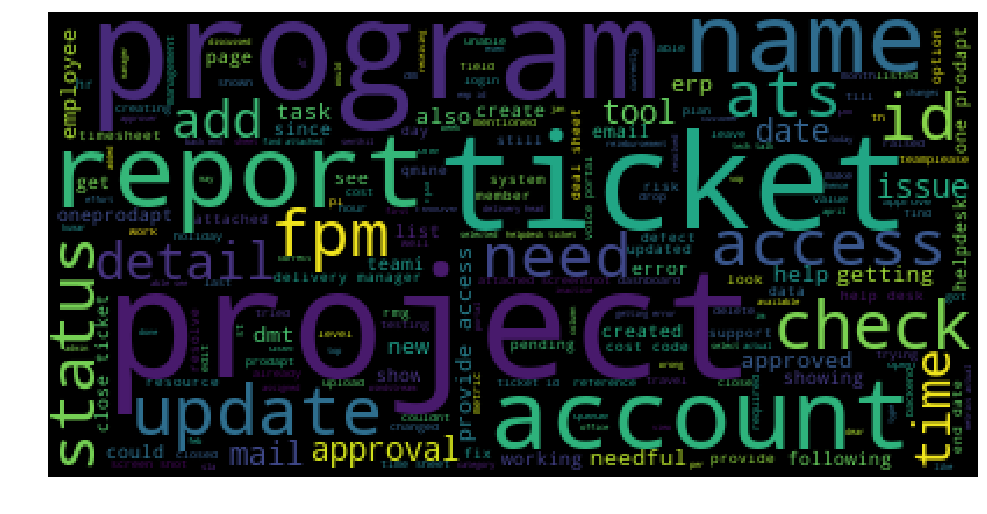

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.axis('off')
wc = WordCloud(background_color ='black', stopwords = stopwords).generate(' '.join(data['cleaned_dis']))
plt.imshow(wc)

In [61]:
data = data.dropna(subset=['cleaned_res'])

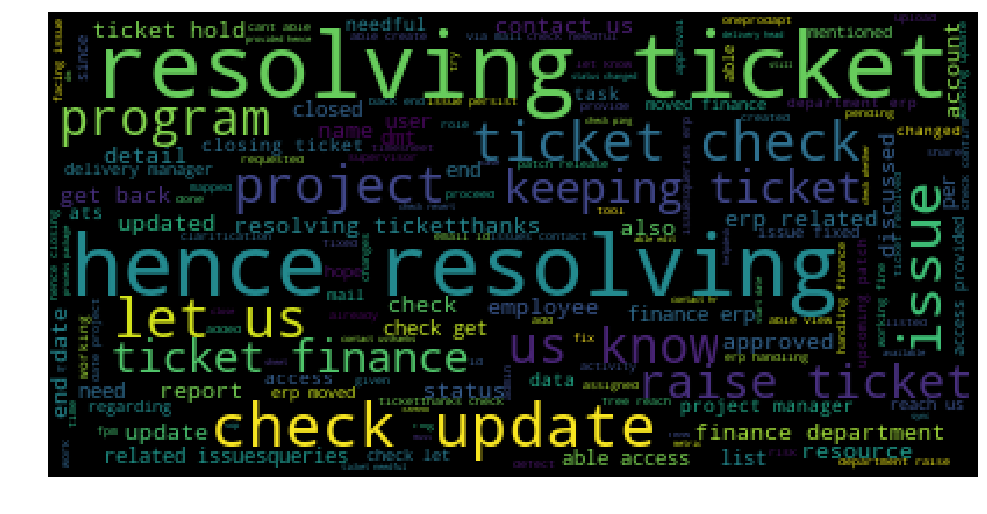

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.axis('off')
wc = WordCloud(background_color ='black', stopwords = stopwords).generate(' '.join(data['cleaned_res']))
plt.imshow(wc)

# ticket traffic

In [69]:
df = data['Requested On']
df = pd.to_datetime(df)
data['timestart'] = df

In [46]:
df1 = data['Actual Completion']
df1 = pd.to_datetime(df1)
data['timeend'] = df1

In [47]:
data.to_csv('file2tool.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'file2tool.csv'

In [22]:
timedata = pd.read_csv("file2tooltest.csv",index_col=['timestart'], parse_dates=['timestart'] )

In [23]:
timedata.head(2)

,Record ID,Requested By,Requested On,Description,Location,Category,Sub Category,Type,Priority,Severity,...,Response Status,Completion Status,Resolution,Resolved By.1,Rating,Rating Remarks,Emp id,cleaned_dis,cleaned_res,timeend
timestart,,,,,,,,,,,,,,,,,,,,,
2019-04-30 18:16:33,53461,Rakesh Sekar2301,2019-04-30 18:16:33,Im not able to enter time sheet entry in one p...,Bengaluru - IT,Oneprodapt,Qmine,Service Request,Medium,Sev 1,...,Response Compliance,Completion Compliance,Please make sure that the tasks assigned to yo...,Deepika R,NaN,NaN,2301,im able enter time sheet entry one prodapt aud...,make sure tasks assigned work progress status ...,2019-05-07 15:23:08
2019-04-30 16:41:46,53425,Deepika R2704,2019-04-30 16:41:46,Timesheet report needs to send to management,OMR-IT,Oneprodapt,DMT,Service Request,Medium,Sev 1,...,Response Compliance,Completion Compliance,Report sent.\n\nHence closing this ticket.,Deepika R,Exceeds,NaN,2704,timesheet report needs send management,report senthence closing ticket,2019-04-30 17:52:38


In [24]:
ts = timedata['']

In [25]:
import matplotlib.pyplot as plt


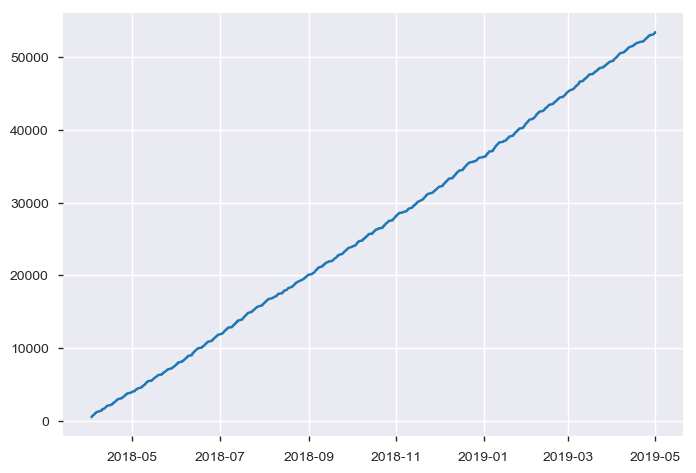

In [27]:
plt.plot(ts)

In [28]:
timedata.columns

Index(['Record ID', 'Requested By', 'Requested On', 'Description', 'Location',
       'Category', 'Sub Category', 'Type', 'Priority', 'Severity', 'Cost Code',
       'Status', 'Approval Details', 'Approved On', 'Resolved By',
       'Response Due', 'Actual Response', 'Completion Due',
       'Actual Completion', 'SLA Status', 'Response Status',
       'Completion Status', 'Resolution', 'Resolved By.1', 'Rating',
       'Rating Remarks', 'Emp id', 'cleaned_dis', 'cleaned_res', 'timeend'],
      dtype='object')

In [29]:
timedata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1606 entries, 2019-04-30 18:16:33 to 2018-04-02 10:43:17
Data columns (total 30 columns):
Record ID            1606 non-null int64
Requested By         1606 non-null object
Requested On         1606 non-null object
Description          1606 non-null object
Location             1606 non-null object
Category             1606 non-null object
Sub Category         1606 non-null object
Type                 1606 non-null object
Priority             1606 non-null object
Severity             1606 non-null object
Cost Code            1598 non-null object
Status               1606 non-null object
Approval Details     14 non-null object
Approved On          1605 non-null object
Resolved By          1463 non-null object
Response Due         1605 non-null object
Actual Response      1598 non-null object
Completion Due       1505 non-null object
Actual Completion    1455 non-null object
SLA Status           1559 non-null object
Response Status     

In [37]:
timedata2 = pd.read_csv("file2tooltest.csv")

In [38]:
timedata2.isnull().sum()

Record ID              0
Requested By           0
Requested On           0
Description            0
Location               0
Category               0
Sub Category           0
Type                   0
Priority               0
Severity               0
Cost Code              7
Status                 0
Approved On            0
Resolved By          138
Response Due           0
Actual Response        7
Completion Due        97
Actual Completion    146
SLA Status            44
Response Status       44
Completion Status     44
Resolution             0
Resolved By.1        138
Rating               197
Emp id                 0
cleaned_dis            0
cleaned_res            1
timestart              0
timeend              146
dtype: int64

In [40]:
timedata2 = timedata2.dropna()

In [41]:
timedata2.shape

(1391, 29)

In [43]:
timedata2.to_csv('file2toolnn.csv',index=False)

In [44]:
timedata

,Record ID,Requested By,Requested On,Description,Location,Category,Sub Category,Type,Priority,Severity,...,Completion Status,Resolution,Resolved By.1,Rating,Rating Remarks,Emp id,cleaned_dis,cleaned_res,timestart,timeend


# TOPIC MODELLING

In [65]:
data.head(1).T

,0
Record ID,53461
Requested By,Rakesh Sekar2301
Requested On,2019-04-30 18:16:33
Description,Im not able to enter time sheet entry in one p...
Location,Bengaluru - IT
Category,Oneprodapt
Sub Category,Qmine
Type,Service Request
Priority,Medium
Severity,Sev 1


In [68]:
import gensim
import nltk

In [67]:
#!pip install gensim

  Stored in directory: C:\Users\arunsingh.s\AppData\Local\pip\Cache\wheels\2c\19\c6\bf38e867cb6e75999e3ff80302eb27bdf488b333efadfbfed7
  Stored in directory: C:\Users\arunsingh.s\AppData\Local\pip\Cache\wheels\5f\ea\fb\5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built gensim smart-open


In [70]:
dictionary = gensim.corpora.Dictionary(docs_clean)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string